# Part A - Titanic Dataset (Kaggle)

## __Sections:__
    - Introduction
    - Importing libraries
    - Creating functions
    - Importing and Exploring data 
    - Data Cleaning and Feature Engineering
    - Model Training and Evaluation
    - Tuning Hyperparameters
    - Conclusion
    - References

### Introduction

**Purpose of Analysis** - To find out the sorts of people likely to have survived the sinking of Titanic

<font color="blue">
Libraries used - 
    
    1. sci-kit learn
    2. pandas
    3. numpy  
    4. matplotlib
    5. seaborn
</font>


### Importing Libraries

In [1]:
# data analysis
import pandas as pd
import numpy as np

# graphing and visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use( 'ggplot' )
plt.rcParams[ 'figure.figsize' ] = 8 , 6
sns.set_style( 'white' )

# helpers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# machine learning
from sklearn.grid_search import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

C:\Users\Lewis\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Lewis\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Lewis\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Creating Functions

In [2]:
def plot_correlation_map( df ):
    corr = train_df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))   

# return confusion matrix based on the what model was used and predictions made
def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test,model_used.predict(x_test))
    col = ['Predicted Dead','Predicted Survived']
    cm = pd.DataFrame(cm)
    cm.columns = ['Predicted Dead', 'Predicted Survived']
    cm.index = ['Actually Dead', 'Actually Survived']
    cm[col] = np.around(cm[col].div(cm[col].sum(axis = 1),axis = 0),decimals = 2)
    return cm

### Importing and Exploring Data

In [3]:
train_df = pd.read_csv('Titanic/data/train.csv')

**Variable Description**

    Survived: Survived (1) or died (0)
    Pclass: Passenger's class
    Name: Passenger's name
    Sex: Passenger's sex
    Age: Passenger's age
    SibSp: Number of siblings/spouses aboard
    Parch: Number of parents/children aboard
    Ticket: Ticket number
    Fare: Fare
    Cabin: Cabin
    Embarked: Port of embarkation

In [4]:
# get total number of rows in train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From this, I can tell that the following columns have missing values:
    
    - Age      (177 missing values)
    - Cabin    (687 missing values)
    - Embarked (2 missing values)

In [5]:
# Print head of data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# print tail of data
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the above 10 rows, I decide to remove the following rows which will not provide more context towards the survival of the passengers: 

    - PassengerId (unnecessary)
    - Name (sex indicates gender already, pClass can tell us more about 
            them)
    - Ticket 
    - Cabin

In [7]:
# Dropping the aforementioned 4 columns
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
# printing the top and last 5 rows again to ensure columns were dropped
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# print tail of data
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


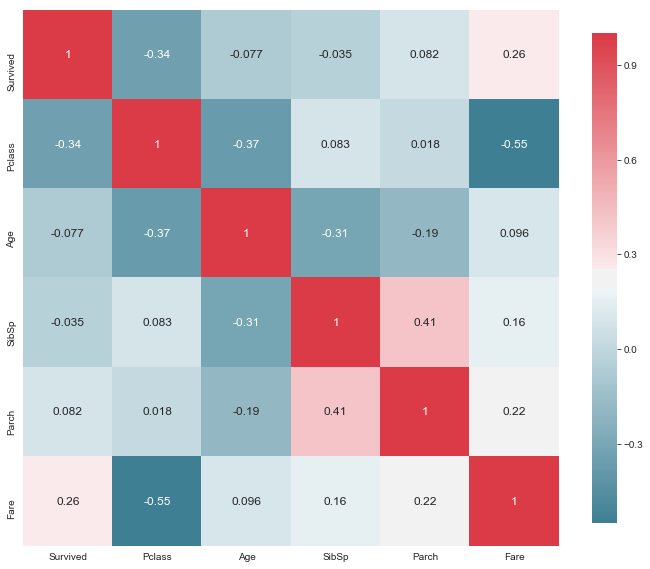

In [10]:
# plot correlation between the columns with pearson correlation coefficient
# 0 means unlikely to affect
# 1 means likely to survive
# -1 means likely to not survive
plot_correlation_map(train_df)

### Data Cleaning and Feature Engineering

In [11]:
# Replace male and female with values
le = LabelEncoder()
#le.fit_transform?
train_df['Sex'] = le.fit_transform(train_df['Sex'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [12]:
# Fill missing ages with median (28)
age_array = train_df[train_df['Age']!= np.nan]['Age']
train_df['Age'] = train_df['Age'].replace(np.nan, age_array.median())
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [13]:
# use getdummies to separate Embarked 
train_df = pd.get_dummies(train_df, columns=['Embarked'])
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Model Training and Evaluation

In [14]:
# Setting up datasets for training, validation and testing
y_survived = train_df['Survived']
train_df1 = train_df.copy()
train_df1.drop('Survived', axis=1, inplace=True)
x_train, x_test, y_train, y_test = train_test_split(train_df1, y_survived)

First, define a Dummy Classifier.

This will be used later to be compared with as a baseline

In [15]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent')

dummy.fit(x_train,y_train)
print('Training Accuracy: ' + str(dummy.score(x_train, y_train)))
print(confusion_matrix_model(dummy))

dummy.fit(x_test, y_test)
print()
print('Testing Accuracy: ' + str(dummy.score(x_test, y_test)))
print(confusion_matrix_model(dummy))


Training Accuracy: 0.6092814371257484
                   Predicted Dead  Predicted Survived
Actually Dead                 1.0                 0.0
Actually Survived             1.0                 0.0

Testing Accuracy: 0.6367713004484304
                   Predicted Dead  Predicted Survived
Actually Dead                 1.0                 0.0
Actually Survived             1.0                 0.0


In [16]:
# use a variety of models to test the dataset I have cleaned
models = [
    KNeighborsClassifier(),
    LogisticRegression(),
    SVC(),
    MLPClassifier(),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
]

names = [
    "K-Nearest Neighbor",
    "Logistics Regression",
    "Support Vector", 
    "Neural Network",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes"
]
i = 0
train_score = []
test_score = []

for model in models:
    model.fit(x_train, y_train)
    train_score.append(model.score(x_train, y_train))
    test_score.append(model.score(x_test, y_test))
    # get confusion matrix for each model
    print(names[i]);print('-'*20)
    print(confusion_matrix_model(model))
    print();print('*'*60)
    i = i+1
    
model_results = pd.DataFrame(columns = ['Models', 'Training Accuracy', 'Testing Accuracy'])
model_results['Models'] = names
train = pd.Series(train_score)
test = pd.Series(test_score)
model_results['Training Accuracy'] = train_score
model_results['Testing Accuracy'] = test_score

K-Nearest Neighbor
--------------------
                   Predicted Dead  Predicted Survived
Actually Dead                0.82                0.18
Actually Survived            0.33                0.67

************************************************************
Logistics Regression
--------------------
                   Predicted Dead  Predicted Survived
Actually Dead                0.92                0.08
Actually Survived            0.28                0.72

************************************************************
Support Vector
--------------------
                   Predicted Dead  Predicted Survived
Actually Dead                0.84                0.16
Actually Survived            0.38                0.62

************************************************************
Neural Network
--------------------
                   Predicted Dead  Predicted Survived
Actually Dead                0.89                0.11
Actually Survived            0.31                0.69

***********

What can I conclude from the confusion matrix printed? (i.e which is bias)
For this dataset, 
     - FALSE POSITIVE would refer to <Actually Dead but Predicted Surived>
     - FALSE NEGATIVE would refer to <Actually Survived but Predicted Dead>
Models that have a __high__ FALSE POSITIVE  rate and __low__ FALSE NEGATIVE would be counted as bias.

Since the models tested do not have high FP (>0.80) or low FN values (<0.20), they are unlikely to be bias.

In [17]:
model_results

,Models,Training Accuracy,Testing Accuracy
0,K-Nearest Neighbor,0.778443,0.762332
1,Logistics Regression,0.791916,0.843049
2,Support Vector,0.878743,0.757848
3,Neural Network,0.787425,0.816143
4,Gaussian Process,0.946108,0.753363
5,Decision Tree,0.980539,0.838565
6,Random Forest,0.980539,0.847534
7,Naive Bayes,0.781437,0.834081


I will choose to use Testing Accuracy to decide on which model is the best.

Therefore, __Logistics Regression__ will be the best choice as it has the highest Testing Accuracy of 0.82 and it also has the smallest difference between Training and Testing Accuracy.

### Tuning HyperParameters

Here, I will attempt to tune the hyperparameters of my Logistic Regression model so as to see if the results can be improved.

In [18]:
lr = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

new_lr = GridSearchCV(lr,grid,cv=10)
new_lr.fit(x_test, y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [19]:
print(confusion_matrix_model(new_lr));print()
print("Training Accuracy: {}".format(new_lr.score(x_train,y_train)))
print("Testing Accuracy: {}".format(new_lr.score(x_test,y_test)))

                   Predicted Dead  Predicted Survived
Actually Dead                0.92                0.08
Actually Survived            0.28                0.72

Training Accuracy: 0.7799401197604791
Testing Accuracy: 0.8430493273542601


### Conclusion

Therefore, original Test Accuracy is 0.820628, while the new Test Accuracy is 0.829596

There is an improvement after tuning the LogisticRegression model, hence, I will use the new model.

### References

[Ramansah_Titanic Data Analysis](https://github.com/ramansah/kaggle-titanic/blob/master/Analysis.ipynb)

[Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)

### **Questions to answer:**

How is your prediction task defined? And what is the meaning of the output variable?

    The prediction task is trying to predict the survival of passengers on the Titanic based on variables given in the provided dataset.
    For the output variable, __Survived__ , 1 means survived while 0 means died.

How do you represent your data as features?

     Firstly, I checked the total number of columns in the train.csv by using the pd.info() function. By doing so, I find out that Age, Cabin and Embarked are columns that have missing values.
     Upon further inspection, I decide to remove PassengerId, Name, Ticket and Cabin columns as I do not think they are necessary in the prediction task.
     Afterwards, I plot a correlation map and focused on the Survived row.
     This allows me check how the various features affect the survivability of the passengers. The features that are closer to -1 on the map are likely to decrease the passnger's survivability, while those closer to 1 are likely to increase the passenger's chances of survival.

Did you process the features in any way?

    I first encode the Sex column into 0 (female) and 1 (male). This is to change the column from text to numerical values.
    Afterwards, I handle missing data in the Age column by filling it with the median age of 28.
    Then I split the Embarked column with get_dummies as there is no ordering to the 3 values in the column. This ensures that the model used does not prioritise any value over the other. 

Did you bring in any additional sources of data?
    
    No
How did you select which learning algorithms to use?
    
    As this is my first time doing a ML project, I decided to use multiple learning algorithms. 
    The models I used were :
        - K-Nearest Neighbor
        - Logistics Regressoin
        - Support Vector
        - Nerual Network
        - Gaussian Process
        - Decision Tree
        - Random Forest
        - Naive Bayes

Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
    
    After testing the models, I found out that Logistic Regression yielded the best results, hence, I decided to tune its hyperparameters through the use of GridSearchCV, resulting in a 0.008968 improvement.

How do you evaluate the quality of your system?
    
    By comparing the Training and Testing accuracy of each model, following that, I also tested the models with a confusion matrix to ensure that they are not biased.

How well does your system compare to a stupid baseline?

    The training accuracy for my baseline is 0.624251497005988, which is 0.1 lower than my LR model at 0.7874251497005988. 
    
    Furthermore, The testing accuracy for my baseline is 0.5919282511210763, which is 0.3 lower than my LR model, hence, it performs much better compared to the baseline.

Can you say anything about the errors that the system makes? For a classification task, you may consider a confusion matrix.

    The LR model I used had a 26% false negative rate and a 11% false positive rate. This means that the model has a chance of predicting passengers having survived but actually they died AND also, predicting that passengers that died, actually survived. This means that the model is still prone to errors despite having the highest accuracy out of all tested models. Therefore, the predictions made by it cannot be 100% trusted.
    

Is it possible to say something about which features the model considers important? (Whether this is possible depends on the type of classifier you are using)


************

# Part B - AMES Housing Dataset

## Introduction

**Purpose of Analysis** - To predict the price of a house based on the provided features

<font color="blue">
Libraries used - 
    
    1. sci-kit learn
    2. pandas
    3. numpy  
    4. matplotlib
    5. seaborn
</font>

### Importing libraries

In [68]:
# Imports
import math

import numpy as np
import pandas as pd
import scipy.stats

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

### Importing and Exploring Data

In [41]:
train = pd.read_csv('AMES/data/train.csv')
test = pd.read_csv('AMES/data/test.csv')

In [42]:
print('Training dataset has {} rows and {} columns.'.format(train.shape[0], train.shape[1]))
print('Test dataset has {} rows and {} columns.'.format(test.shape[0], test.shape[1]))

Training dataset has 1460 rows and 81 columns.
Test dataset has 1459 rows and 80 columns.


In [43]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [44]:
test.head() 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.info(memory_usage='deep')

### Checking the prices of the houses

The cheapest house sold for $34,900 and the most expensive for $755,000
The average sales price is $180,921, while median is $163,000


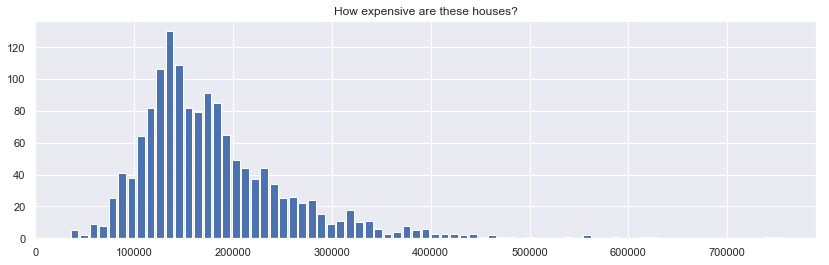

In [46]:
print('The cheapest house sold for ${:,.0f} and the most expensive for ${:,.0f}'.format(
    train.SalePrice.min(), train.SalePrice.max()))
print('The average sales price is ${:,.0f}, while median is ${:,.0f}'.format(
    train.SalePrice.mean(), train.SalePrice.median()))
train.SalePrice.hist(bins=75, rwidth=.8, figsize=(14,4))
plt.title('How expensive are these houses?')
plt.show()

__NOTE__ that the distribution is positively skewed to the right with a good number of outliers.

### Check year the houses were built

Oldest house built in 1872. Newest house built in 2010.


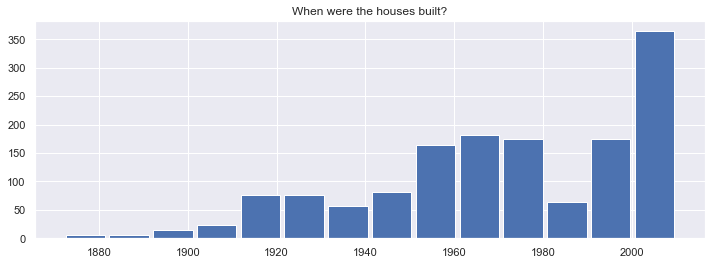

In [47]:
print('Oldest house built in {}. Newest house built in {}.'.format(
    train.YearBuilt.min(), train.YearBuilt.max()))
train.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()

### Check when the houses were sold

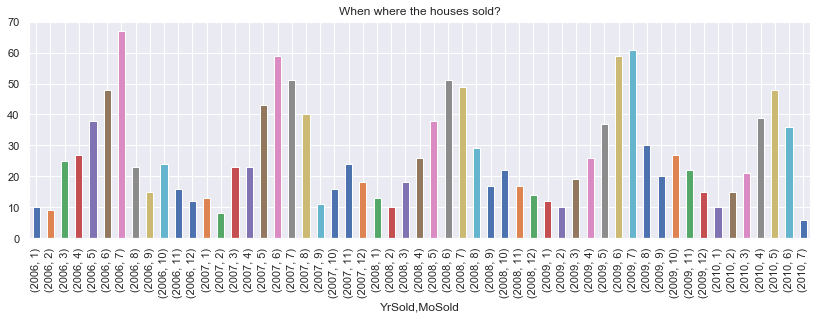

In [48]:
train.groupby(['YrSold','MoSold']).Id.count().plot(kind='bar', figsize=(14,4))
plt.title('When where the houses sold?')
plt.show()

We see a strong seasonal pattern in house sales, with peaks in June and July. We verify that the dataset spans 2006 to 2010, but note that data steps mid-year in July of 2010.

Does the time of year a house is sold have any effect on sales price?
We'll address this question once we start our multivariate analysis later on.

### Check neighborhoods of the houses

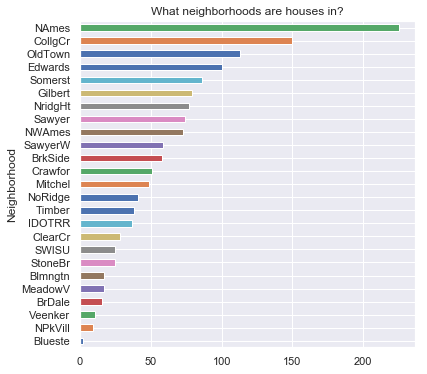

In [49]:
train.groupby('Neighborhood').Id.count().\
    sort_values().\
    plot(kind='barh', figsize=(6,6))
plt.title('What neighborhoods are houses in?')
plt.show()



Looks like a good chunk of houses are in North Ames, Collect Creek, and Old Town, with few houses in Bluestem, Northpark Villa and Veenker.

If there's any truth to the real estate dictum "location, location, location" we should see this feature correlate with the Sales Price. 
It would also be interesting to augment the dataset with additional information as it relates to neighborhoods. For example, from my own time spent on Zillow, there seems to be an undeniable correlation between house prices and school quality, the latter of which is not capture in our dataset.

### Check sizes of the houses

The average house has 1,515 sq ft of space, the median 1,464 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


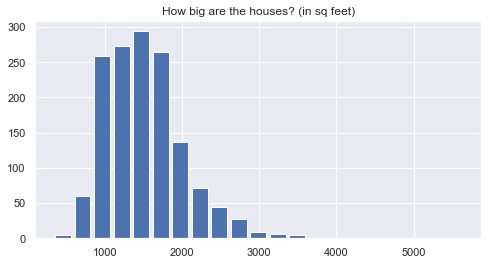

In [51]:
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    train.GrLivArea.mean(), train.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    train.GrLivArea.max(), train.GrLivArea.min()))
train.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('How big are the houses? (in sq feet)')
plt.show()

### Check lot sizes

The average lot is 0.24 acres, the median 0.22 acres
The biggest lot is 4.94 acres, the smallest 0.03 acres


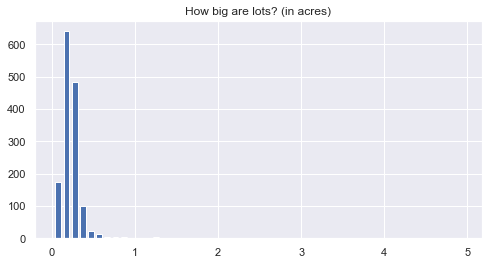

In [52]:
sqft_to_acres = 43560.
print('The average lot is {:,.2f} acres, the median {:,.2f} acres'.format(
    train.LotArea.mean()/sqft_to_acres, train.LotArea.median()/sqft_to_acres))
print('The biggest lot is {:,.2f} acres, the smallest {:,.2f} acres'.format(
    train.LotArea.max()/sqft_to_acres, train.LotArea.min()/sqft_to_acres))
(train.LotArea/sqft_to_acres).hist(bins=50, rwidth=.7, figsize=(8,4))
plt.title('How big are lots? (in acres)')
plt.show()

We can see that both the square footage of a house and lot size are positively skewed, but lot size much more so with plenty of outliers. I expect both of these to show significant correlation with sales price.

Ok, that's good for now. We took a look at how expensive houses are, when they were built, where they are, and how big they and the lots they're on are.

Let's now dive into the details more systematically.

### Obtaining list of numerical and categorical features, excluding SalePrice and Id

In [54]:
def get_feature_groups():
    # Numerical Features
    num_features = train.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = train.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

num_features, cat_features = get_feature_groups()

### Numerical Features

#### SalePrice

C:\Users\Lewis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


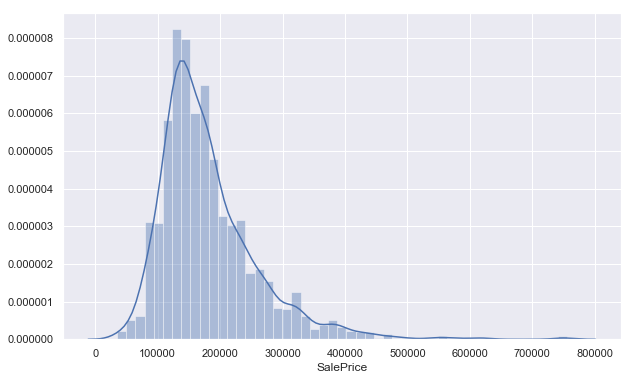

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(train.SalePrice)
plt.show()

In [56]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    train.SalePrice.skew(), train.SalePrice.kurtosis()))

Skew: 1.883 | Kurtosis: 6.536


SalePrice is __positively skewed__ and "peaky" with fat tails, or outliers, namely to the right. 

#### Check distribution of all numerical features

C:\Users\Lewis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


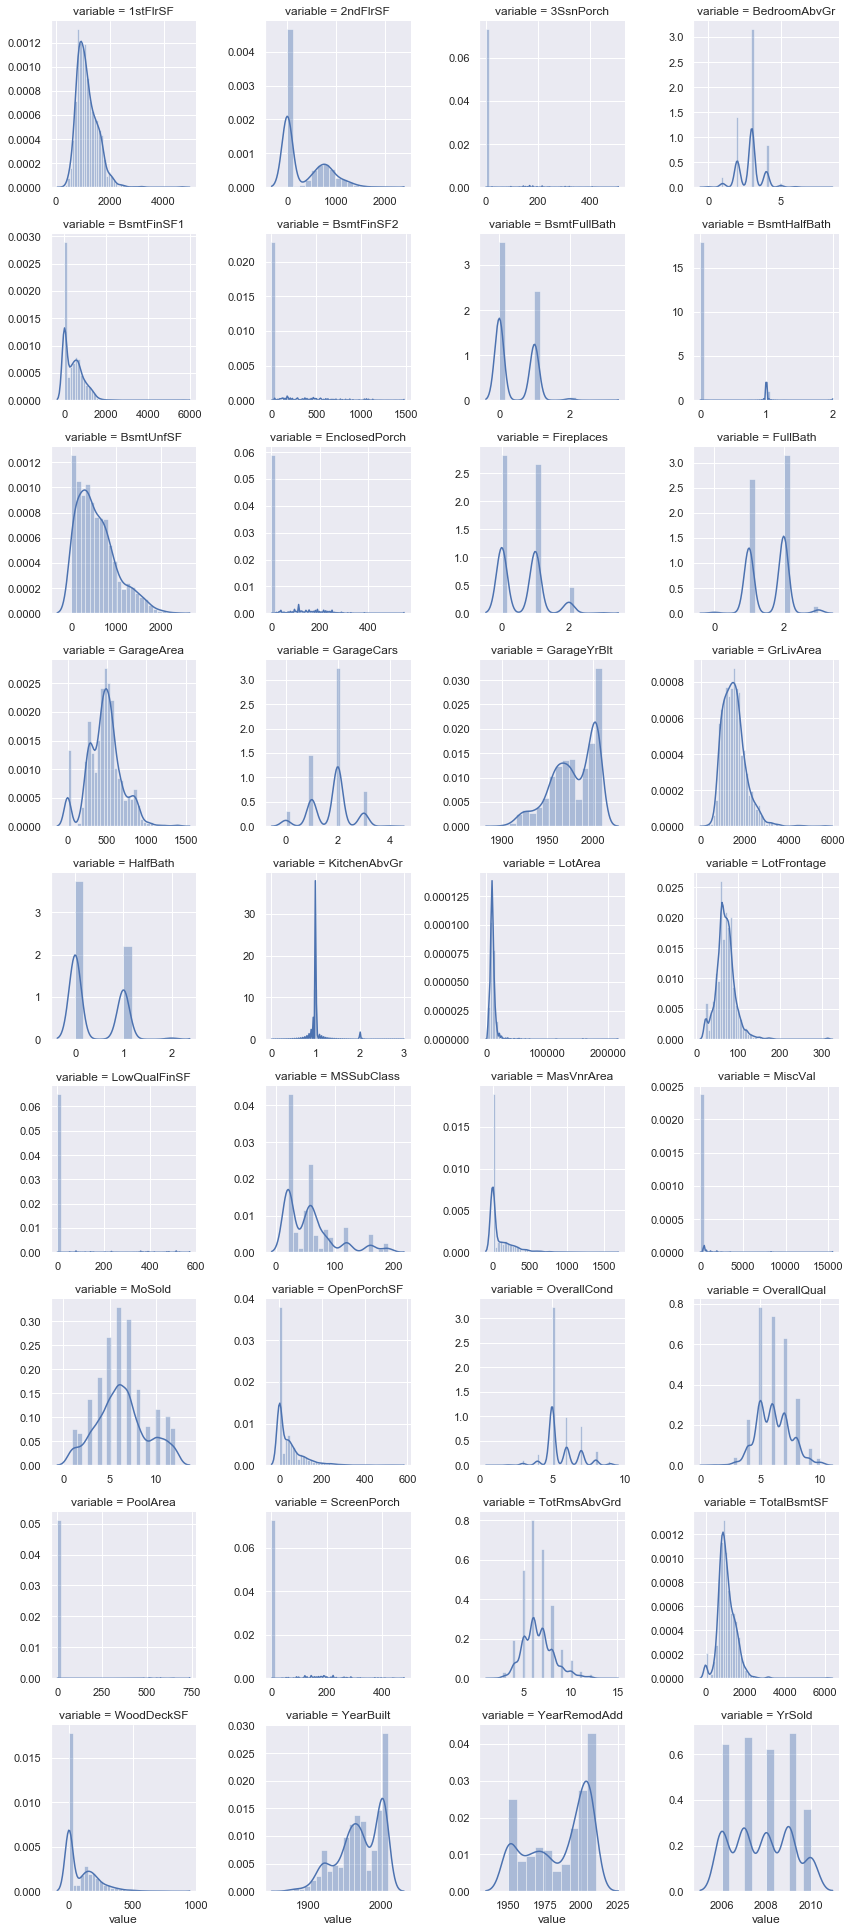

In [57]:
f = pd.melt(train, value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

We see a bunch of features that look positively skewed, similar to SalePrice. We'll want to log transform these, include: LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, GrLivAre, GarageArea

We see time related features: YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold

We note that MSSubclass should really be categorical, and make a note to ourselves to take care of this when we process the data later on. 
For purposes of regression, we should also treat MoSold as categorical as the Euclidean distance between them doesn't make sense in this application. Same for YrSold. For YearBuilt, however, the distance is relevant as it implies age of the house.

Finally, we have plenty of sparse features that have a large zero count, e.g. PoolArea, which is 0 for houses that have no pool. We'll have to think about how to handle these.

#### Percentage of zero values

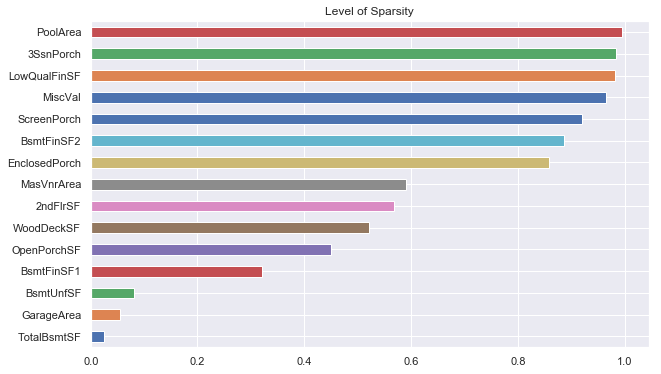

In [58]:
count_features = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars']
non_count_features = [f for f in num_features if f not in count_features]
sparse_features = (train[non_count_features] == 0).sum() / train.shape[0]
sparse_features[sparse_features > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Level of Sparsity')
plt.show()

### Categorical Features

In [59]:
# First off, earlier we said we'll need to transform
# a couple features to categorical. Since we're looking 
# at categorical data here, let's go ahead and do that now
# so they are included in the analysis.
train['MSSubClass'] = train.MSSubClass.apply(lambda x: str(x))
train['MoSold'] = train.MoSold.apply(lambda x: str(x))
train['YrSold'] = train.YrSold.apply(lambda x: str(x))

# Update our list of numerical and categorical features
num_features, cat_features = get_feature_groups()

#### Count plots of Categorical Features

C:\Users\Lewis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


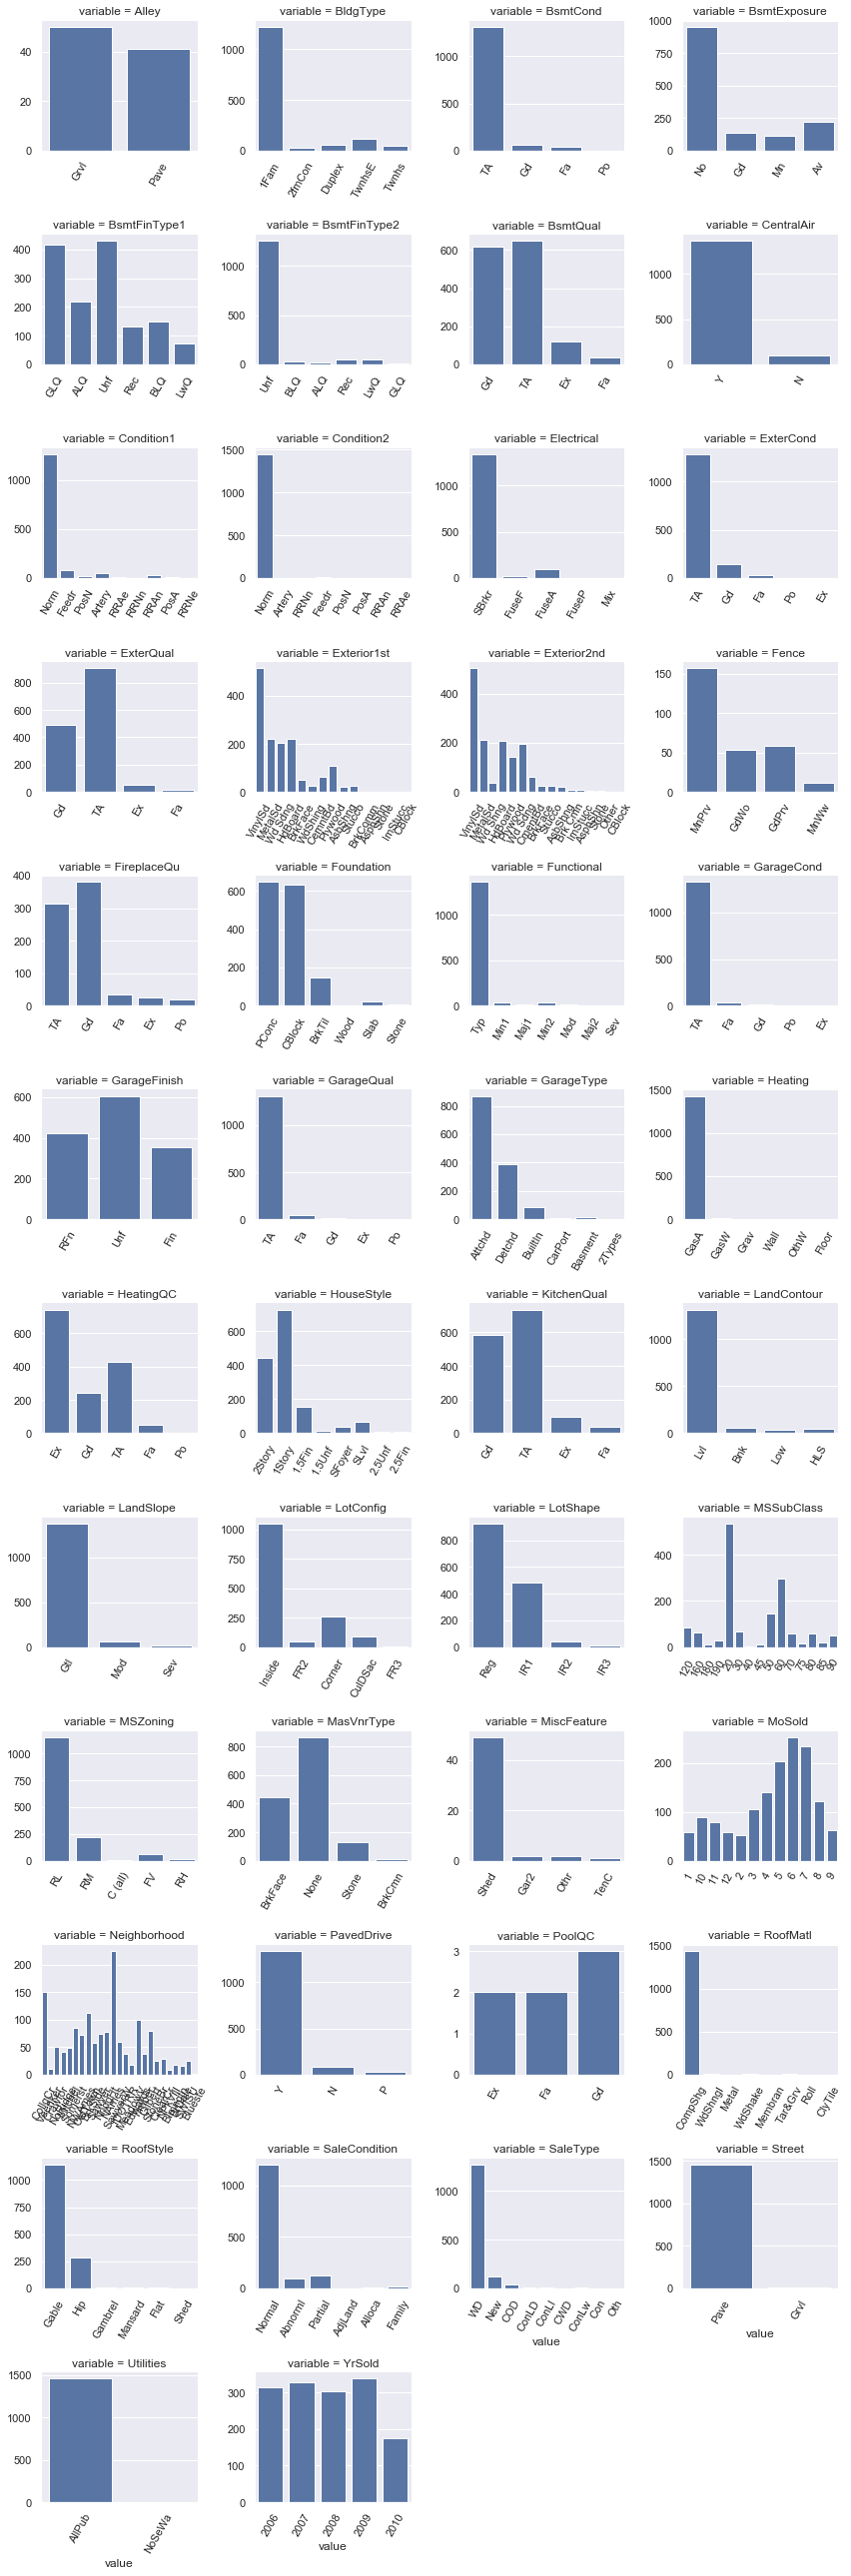

In [60]:
f = pd.melt(train, value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

The categorical features will be much more interesting when compared to our target feature SalePrice, but we can note a couple of things nevertheless. 

First, we note that there are plenty of feature where one value is heavily over-represented, e.g. Condition2 (Proximity to various conditions (if more than one is present)), where nearly 99% of houses are listed as "Norm". That's fine though, as those edge cases may help us predict outliers.

Secondly, a number of categorical features actually contain rank information in them and should thus be converted to discrete quantitative features similar to OverallQual. 

For example, ExterQual has the following values:

    Ex - Excellent
    Gd - Good
    TA - Average/Typical
    Fa - Fair
    Po - Poor

We should change these to be 1 to 5. We'll do that for the following features: Alley, LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, HeatingQC, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQuality, GarageCond, PavedDrive, PoolQC

#### Converting values

In [61]:
# Alley
train.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
train.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
train.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
train.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope
train.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
train.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
train.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
train.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
train.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
train.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
train.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
train.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
train.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
train.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
train.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
train.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
train.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
train.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
train.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
train.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
train.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# We'll set all missing values in our newly converted features to 0
converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']
train[converted_features] = train[converted_features].fillna(0)

# Update our list of numerical and categorical features
num_features, cat_features = get_feature_groups()

### Comparing Numerical features to SalePrice

C:\Users\Lewis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


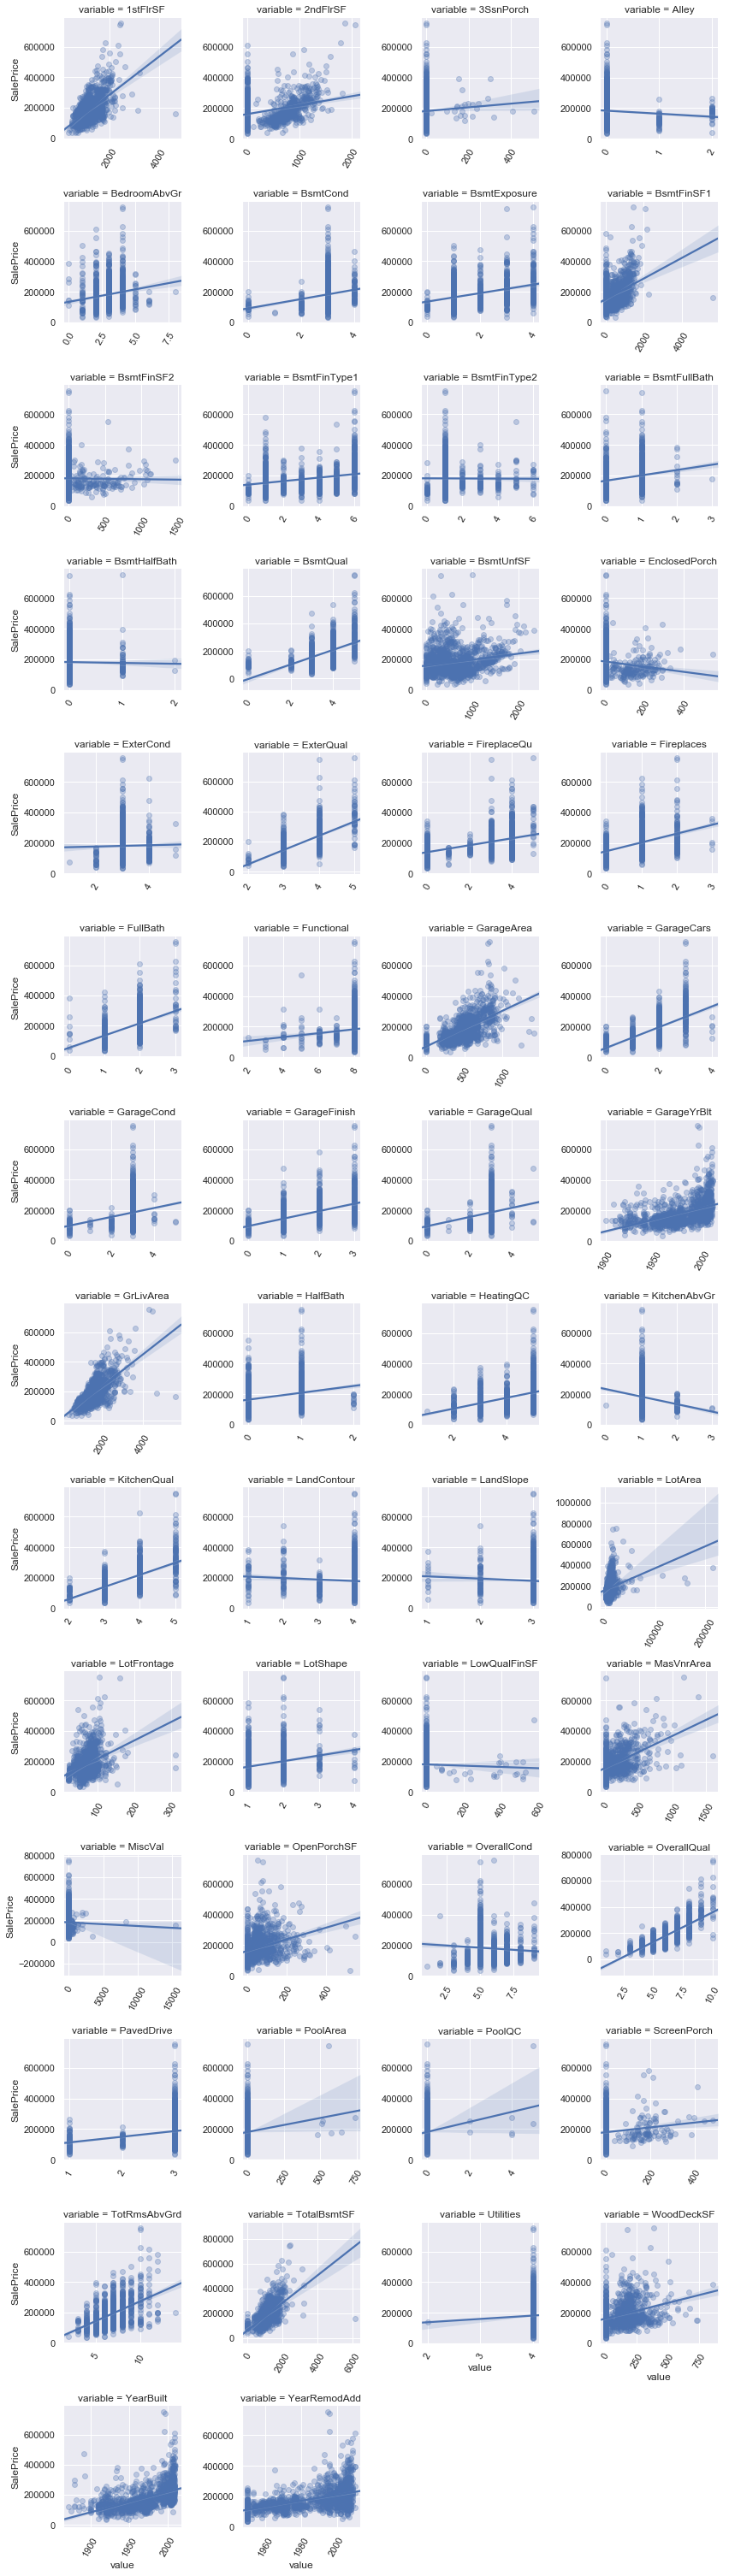

In [62]:
# Scatter plots
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(num_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

We find that there are quite a few features that seem to show strong correlation to SalePrice, such as OverallQual, TotalBsmtSF, GrLivArea, and TotRmsAbvGrd. This confirms our natural intuition: we would expect that high quality, big house with big basements and lots of rooms to be more expensive.

We also note the occurrence of cone shapes, as a result of skewed distributions. Once log transformation is done to some of these features, the relationship will be more linear.

C:\Users\Lewis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


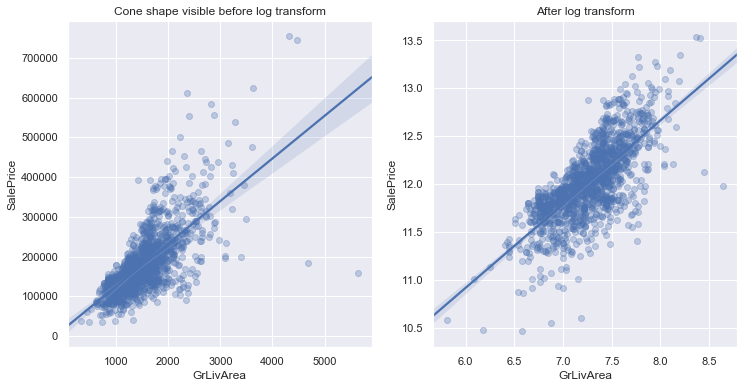

In [63]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(train.GrLivArea, train.SalePrice, scatter_kws={'alpha':0.3})
plt.title('Cone shape visible before log transform')

plt.subplot(122)
sns.regplot(np.log1p(train.GrLivArea), np.log1p(train.SalePrice), scatter_kws={'alpha':0.3})
plt.title('After log transform')
plt.show()

#### Checking correlation between Numerical Features

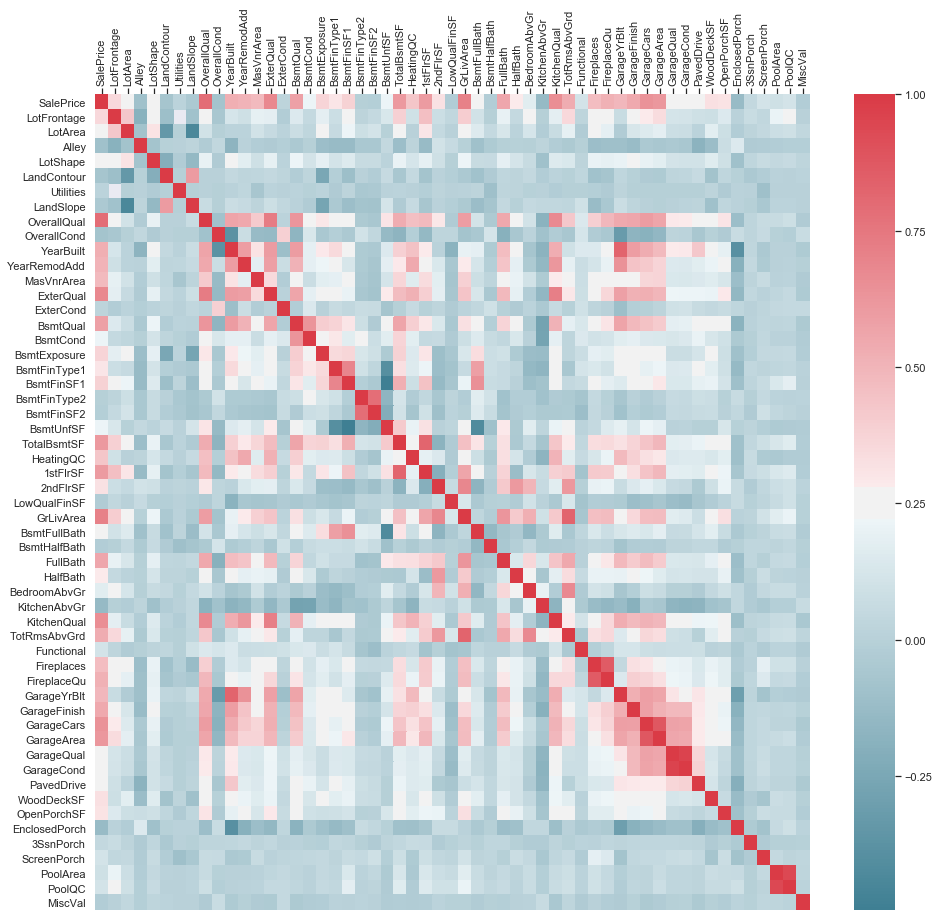

In [64]:
# By using a heatmap
corr = train[['SalePrice'] + num_features].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

We see that there is quite bit of correlation between features, many of which one might expect to find, and perhaps some surprising ones. 

For example, we find that GarageYrBlt is highly correlated with YearBuilt, which means that most garages were built along with the house. BsmtQual correlates with OverallQual and TotalBsmtSF correlates highly with 1stFlrSF, which both make a lot of sense. 

We also see that KitchenQual correlates highly with ExteriorQual; kitchens and housing exteriors are of course two separate things, but may point to a lurking variable, such as "new house": a newer house is likely to have both a better exterior and better kitchen.

Let's hone in on how features correlate with SalePrice.

#### Features sorted by correlation to SalePrice, from positive to negative

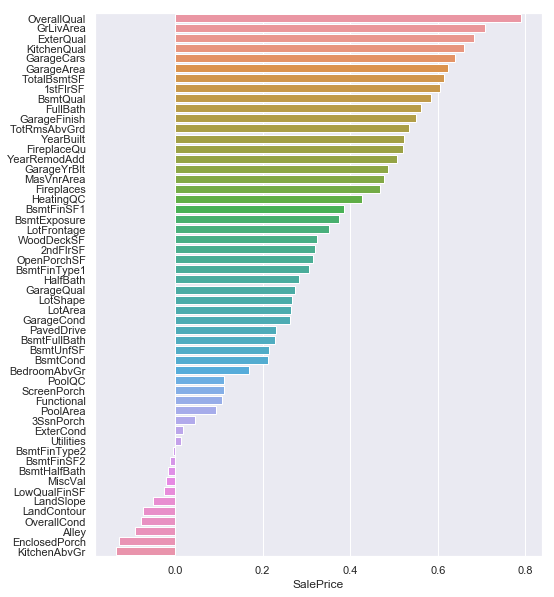

In [65]:
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

The feature most correlated with SalePrice is OverallQual, which makes sense, followed by the size of the house (GrLivArea) and then three more quality related features: ExterQual, KitchenQual, and BsmtQual. We noted earlier that ExterQual and KitchenQual were highly correlated with one another, and now we find out that they are both also highly correlated with SalePrice. 

In regression we usually want to avoid including predictors highly correlated with one another to minimize multicollinearity 

I.E, if we include, for example, both ExterQual and KitchenQual in our regression, we won't be able to say which of those features is "more important" than the other (as we can't trust their coefficients). 

__But the overall predictive power of the model is not affected.__

#### Count plots of Categorical Features

C:\Users\Lewis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lewis\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


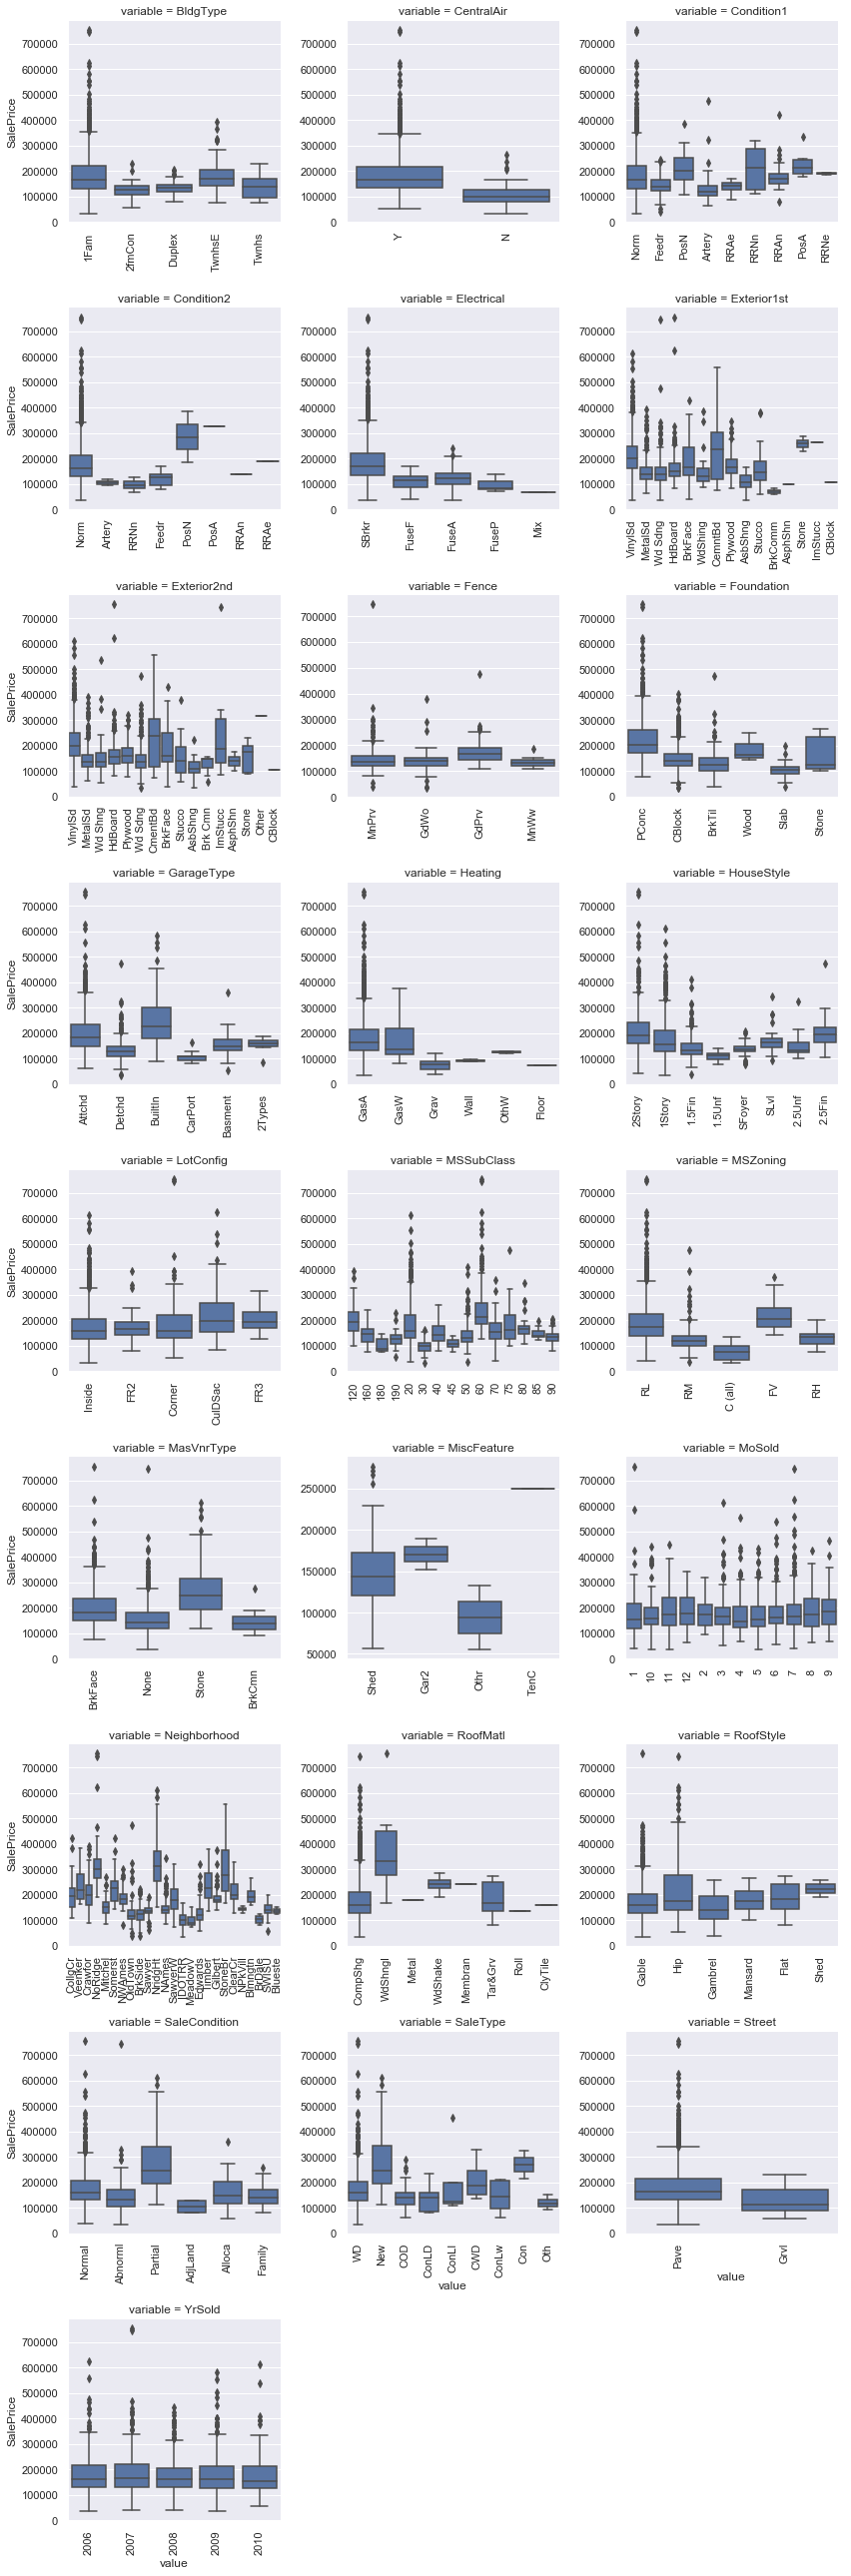

In [66]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=sorted(cat_features))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False, size=4)
g = g.map(sns.boxplot, 'value', 'SalePrice')
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

Some features show significant variance in the mean of SalePrice between different groups, eg. Neighborhood, SaleType or MSSubClass.

BUT, to get a better sense of which features infleunce SalePrice more, we run a ANOVA test for each Categorical feature agaist SalePrice.

This gives both F statistics and p-values for each feature.

Higher F statistics = Higher p-value (i.e. the more confident we can be in rejecting the null hypothesis)

P-value tells us how confident we can be in rejecting the null hypothesis

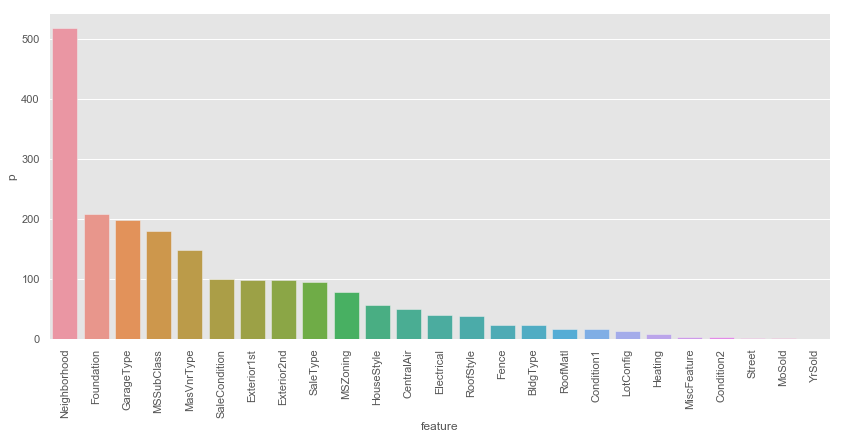

In [69]:
# In order for ANOVA to work, we have to take care of missing values first
train[cat_features] = train[cat_features].fillna('Missing')

# Onward...
anova = {'feature':[], 'f':[], 'p':[]}
for cat in cat_features:
    group_prices = []
    for group in train[cat].unique():
        group_prices.append(train[train[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.f_oneway(*group_prices)
    anova['feature'].append(cat)
    anova['f'].append(f)
    anova['p'].append(p)
anova = pd.DataFrame(anova)
anova = anova[['feature','f','p']]
anova.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(anova.feature, np.log(1./anova['p']))
plt.xticks(rotation=90)
plt.show()

Of all our categorical features, Neighborhood appears to have the greatest influence on SalePrice.

It's important to note here that the chart really undersells how much more influence Neighborhood has. We took the log of the inverse of the p-value (np.log(1./anova['p']): the inverse so that when we take the log we get positive numbers, and log so that we don't just see a single bar. 

In other words, the p-value is a magnitude of about 300 times smaller than the next feature!


#### Check Categorical Features for Missing Values

In [71]:
missing_values = (train[cat_features] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

MiscFeature    1406
Fence          1179
GarageType       81
MasVnrType        8
Electrical        1
dtype: int64

In [72]:
# Since there's only one missing Electrical, let's
# set it equal to the most common type
train.loc[train.Electrical == 'Missing', 'Electrical'] = train.Electrical.mode()[0]

In [75]:
train.MasVnrType.value_counts()
# Let's change "Missing" to "None" here.
train.MasVnrType.replace({'Missing':'None'}, inplace=True)

In [76]:
# We also notice a data discrepancy, we have 
# houses with MasVnrType == None but MasVnrArea > 0 and
# house with MasVnrArea == 0 but MasVnrType != None
# Let's fix these with the assumption that there was a mason veneer
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # most common 
train.loc[(train.MasVnrType == 'None') & (train.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in train.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    train.loc[(train.MasVnrType == vnr_type) & (train.MasVnrArea == 0), 'MasVnrArea'] = \
        train[train.MasVnrType == vnr_type].MasVnrArea.mean() 

#### Checking remaining missing values

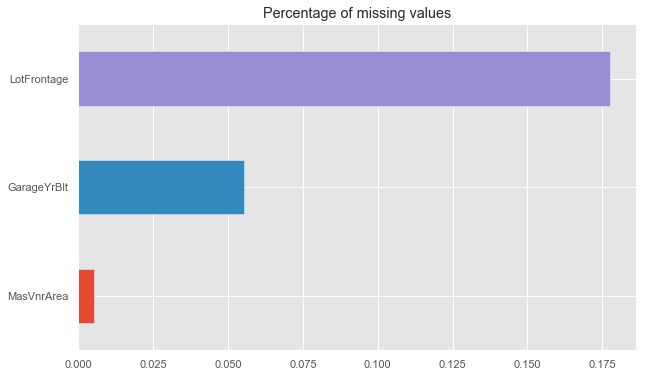

In [77]:
missing_data = train.isnull().sum() / train.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [78]:
# LotFrontage is "Linear feet of street connected to property"
# Since it seems unlikely that there's no street connected
# to a lot, we'll set it equal to the median LotFrontage of that street.
train.LotFrontage = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [79]:
# MasVnrArea is "Masonry veneer area in square feet"
# This feature consists of a majority of 0 values, so 
# it's odd to find missing values here. Let's set to 0
train.MasVnrArea.fillna(0, inplace=True)

In [80]:
# Since GarageYrBlt missing means there's no garage
# we'll set it equal to 0
train.GarageYrBlt.fillna(0, inplace=True)

### Checking outliers

C:\Users\Lewis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


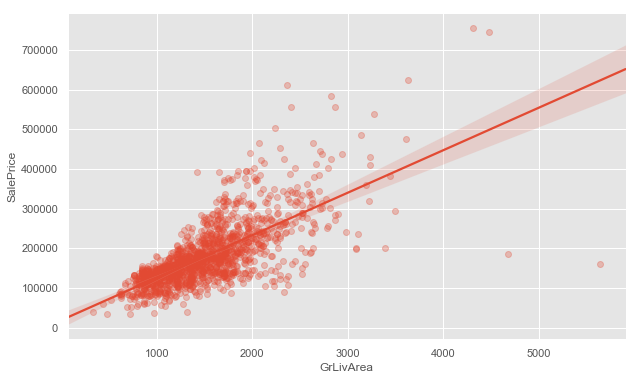

In [81]:
# First we visually inspect a scatter plot of GrLivArea vs. SalePrice
plt.figure(figsize=(10,6))
sns.regplot(train.GrLivArea, train.SalePrice, scatter_kws={'alpha':0.3})
plt.show()

C:\Users\Lewis\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


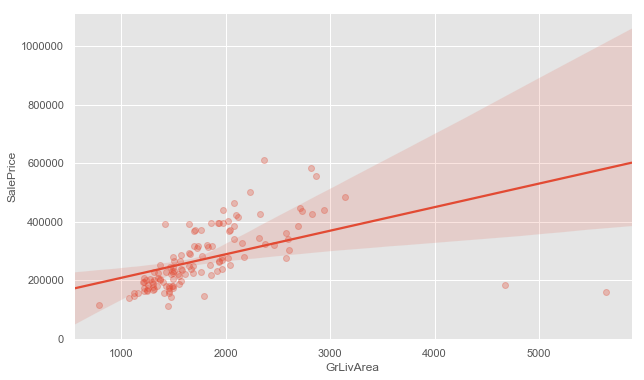

In [82]:
# We see the outliers but are also interested in those Partial Sale outliers
plt.figure(figsize=(10,6))
sns.regplot(train[train.SaleCondition == 'Partial'].GrLivArea,
            train[train.SaleCondition == 'Partial'].SalePrice, scatter_kws={'alpha':0.3})
plt.show()

In [83]:
# We heed the author's advice and cut out anything over 4,000 sq ft as stated in the documentation
train.drop(train[train.GrLivArea >= 4000].index, inplace=True)

### Further Feature Engineering

In [85]:
# Total Square Footage
train['TotalSF'] = train.TotalBsmtSF + train.GrLivArea
train['TotalFloorSF'] = train['1stFlrSF'] + train['2ndFlrSF']
train['TotalPorchSF'] = train.OpenPorchSF + train.EnclosedPorch + \
    train['3SsnPorch'] + train.ScreenPorch
    
# Total Bathrooms
train['TotalBathrooms'] = train.FullBath + .5 * train.HalfBath + \
    train.BsmtFullBath + .5 * train.BsmtHalfBath

# Booleans
train['HasBasement'] = train.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train.GarageArea.apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train.PoolArea.apply(lambda x: 1 if x > 0 else 0)
train['WasRemodeled'] = (train.YearRemodAdd != train.YearBuilt).astype(np.int64)
train['IsNew'] = (train.YearBuilt > 2000).astype(np.int64)
train['WasCompleted'] = (train.SaleCondition != 'Partial').astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew', 'WasCompleted']

In [86]:
# Updating
num_features, cat_features = get_feature_groups()
num_features = [f for f in num_features if f not in boolean_features]

#### Log Transformations

In [87]:
# Here we will be simplistic about it and simply
# log transform any numerical feature with a 
# skew greater than 0.5
features = num_features + ['SalePrice']
for f in features:
    train.loc[:,f] = np.log1p(train[f])

#### Dummy Variables

In [88]:
y = train['SalePrice']
train.drop('SalePrice', axis=1, inplace=True)
train.drop('Id', axis=1, inplace=True)
model_data = pd.get_dummies(train).copy()

### Modeling

Divide our data into three parts: a training, validation, and testing set. 

We use our validation set to optimize hyperparameters and ultimately get a score at the very end using our test set. 

However, in order to not throw out too much data for training, we will use a cross validation strategy whereby random groups of our training set will be held out for validation scoring and finally average

In [92]:
from sklearn.model_selection import train_test_split
# Split data intro train and validation sets
X_train, X_test, y_train, y_test = train_test_split(model_data.copy(), y, test_size=0.3, random_state=42)
print('Shapes')
print('X_train:', X_train.shape)
print('X_val:', X_test.shape)
print('y_train:', y_train.shape)
print('y_val:', y_test.shape)

Shapes
X_train: (1019, 263)
X_val: (437, 263)
y_train: (1019,)
y_val: (437,)


#### Standardising Numerical data

In [90]:
from sklearn.preprocessing import RobustScaler, StandardScaler

# We'll use the convenient sklearn RobustScaler.
# Note we're only standardizing numerical features, not
# the dummy features. The RobustScaler helps us deal with outliers.
stdsc = StandardScaler()
X_train.loc[:,num_features] = stdsc.fit_transform(X_train[num_features])
X_test.loc[:,num_features] = stdsc.transform(X_test[num_features])

#### Root-Mean-Square Error

A frequently used measure of the differences between values perdicted by a model and the values observed.

In [94]:
from sklearn.model_selection import cross_val_score
def rmse(model, X, y):
    cv_scores = -cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=10)
    return np.sqrt(cv_scores)

#### Creating a Dummy Regressor

In [97]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train,y_train)
print('DummyRegressor -> Train RSME: {:.5f} | Test RSME: {:.5f}'.format(
rmse(dummy,X_train,y_train).mean(),rmse(dummy,X_test,y_test).mean()))

DummyRegressor -> Train RSME: 0.39935 | Test RSME: 0.38204


#### Ordinary Least Squares (OLS) Linear Regression, No Regularization

In [99]:
from sklearn.linear_model import LinearRegression
# What we're doing here is adding the dummy features for 
# one categorical feature at a time and running the regression.
dummy_cols = [col for col in model_data.columns if col not in num_features]
features_to_try = []
for cat in cat_features:
    cat_dummies = [c for c in dummy_cols if c.startswith(cat)]
    features_to_try += cat_dummies
    X_train_subset = X_train[num_features + boolean_features + features_to_try]
    X_test_subset = X_test[num_features + boolean_features + features_to_try]
    
    lr = LinearRegression()
    lr.fit(X_train_subset, y_train)
    
    print('Dummy Features: {} | Train RSME: {:.3f} | Test RSME: {:.3f}'.format(
        len(features_to_try), rsme(lr, X_train_subset, y_train).min(), rsme(lr, X_test_subset, y_test).min()))

Dummy Features: 15 | Train RSME: 0.093 | Test RSME: 0.098
Dummy Features: 20 | Train RSME: 0.093 | Test RSME: 0.098
Dummy Features: 22 | Train RSME: 0.093 | Test RSME: 0.097
Dummy Features: 27 | Train RSME: 0.093 | Test RSME: 0.096
Dummy Features: 52 | Train RSME: 0.087 | Test RSME: 0.091
Dummy Features: 61 | Train RSME: 0.087 | Test RSME: 0.092
Dummy Features: 69 | Train RSME: 0.087 | Test RSME: 0.092
Dummy Features: 74 | Train RSME: 0.087 | Test RSME: 0.095
Dummy Features: 82 | Train RSME: 0.088 | Test RSME: 0.093
Dummy Features: 88 | Train RSME: 0.089 | Test RSME: 0.096
Dummy Features: 95 | Train RSME: 0.091 | Test RSME: 0.096
Dummy Features: 110 | Train RSME: 0.096 | Test RSME: 0.100
Dummy Features: 126 | Train RSME: 0.096 | Test RSME: 0.089
Dummy Features: 130 | Train RSME: 0.094 | Test RSME: 0.092
Dummy Features: 136 | Train RSME: 0.094 | Test RSME: 0.096
Dummy Features: 142 | Train RSME: 0.093 | Test RSME: 0.110
Dummy Features: 144 | Train RSME: 0.094 | Test RSME: 0.096
Dummy Fe

We can see that both the Train as well as Test RSME score ends up exploding, so let's skip ahead to regressions using regularization, which keep just this type of issue from happening.

#### Ridge Regression

Ridge Regression is an L2 penalized model where the squared sum of the weights are added to the OLS cost function.

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


# We're using GridSearch here to find the optimal alpha value (tuning hyperparameters)
param_grid = {'alpha': [0.01, 0.1, 1., 5., 10., 25., 50., 100.]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']
ridge = ridge.best_estimator_

print('Ridge -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rmse(ridge, X_train, y_train).mean(), rsme(ridge, X_test, y_test).mean(), alpha))

Ridge -> Train RSME: 0.11672 | Test RSME: 0.12961 | alpha: 5.50000


In [101]:
def model_evaluation_plots(model, X_train, y_train, X_test, y_test):
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)
    
    plt.figure(figsize=(12,6))
    # Residuals
    plt.subplot(121)
    plt.scatter(y_train_preds, y_train_preds - y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_preds, y_test_preds - y_test, c='orange', marker='s', label='Validation data')
    plt.title('Residuals')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=y_train.min(), xmax=y_train.max(), color='red')

    # Predictions
    plt.subplot(122)
    plt.scatter(y_train_preds, y_train, c='blue', marker='o', label='Training data')
    plt.scatter(y_test_preds, y_test, c='orange', marker='s', label='Validation data')
    plt.title('Predictions')
    plt.xlabel('Predicted values')
    plt.ylabel('Real values')
    plt.legend(loc='upper left')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], c='red')
    plt.tight_layout()
    plt.show()

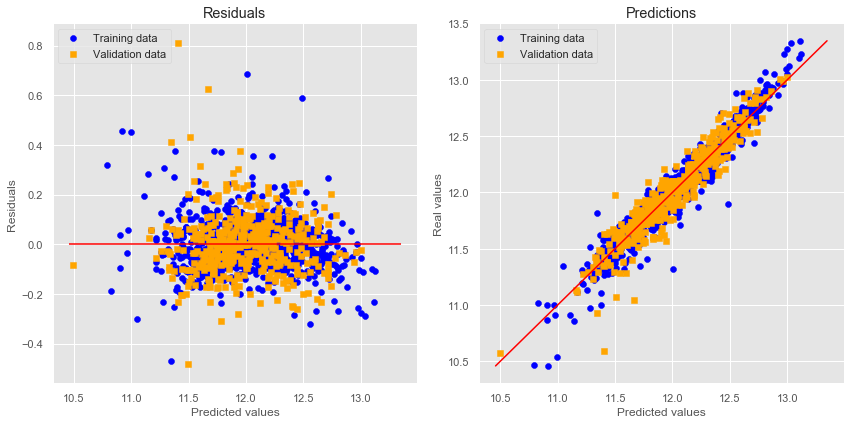

In [103]:
model_evaluation_plots(ridge, X_train, y_train, X_test, y_test)

Looking at the residual plot, we see that the residuals are randomly distributed around the center line, which is good. 

If we saw patterns here it means that the model is unable to capture some explanatory information. We see that our predictions plotted against real values center around the line of perfect fit, again a good sign

Ridge dropped 3 of 263 features.


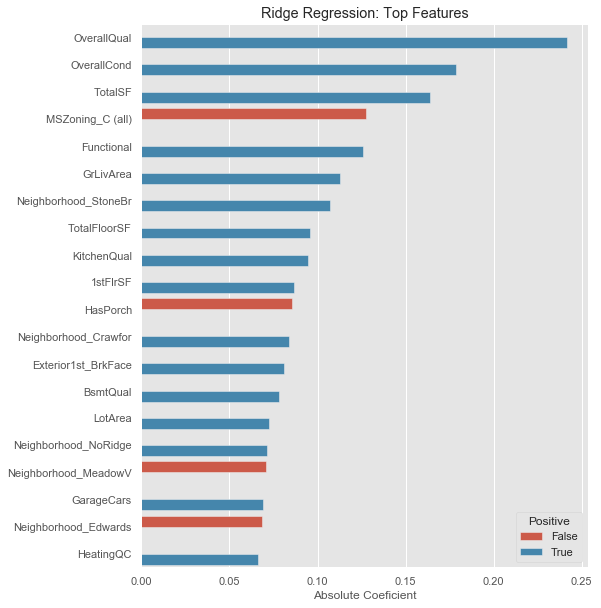

In [108]:
# See what the Ridge regression made of our features.
coefs = pd.DataFrame({'coefs':ridge.coef_,'Positive':ridge.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Ridge dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Ridge Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

#### LASSO Regression

THe LASSO (Least Absolute Shrinkage and Selection Operator) regression is an L1 regularizaton model in which the sum of weights is added to the cost function

In [106]:
from sklearn.linear_model import Lasso

# We're using GridSearch here to find the optimal alpha value
# Get the ballpark
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_

print('Lasso -> Train RSME: {:.5f} | Test RSME: {:.5f} | alpha: {:.5f}'.format(
    rsme(lasso, X_train, y_train).mean(), rsme(lasso, X_test, y_test).mean(), alpha))

Lasso -> Train RSME: 0.11589 | Test RSME: 0.11777 | alpha: 0.00050


LASSO dropped 155 of 263 features.


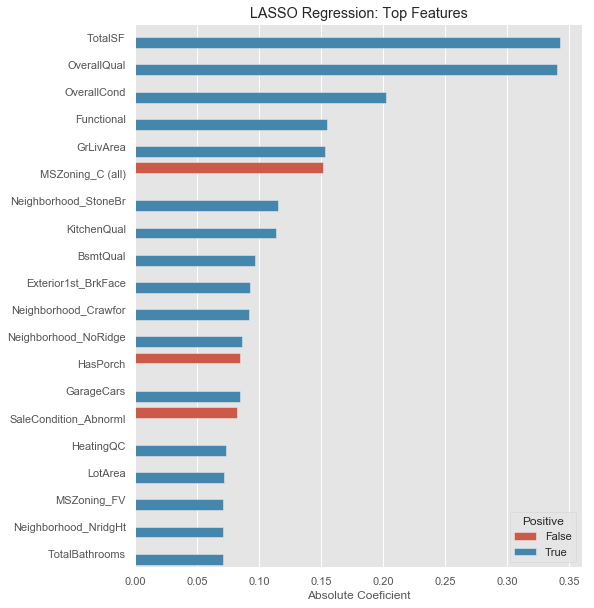

In [109]:
# See what the LASSO regression made of our features.
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

LASSO dropped almost 2/3 of features. Some of the negative coefficients also surprise me, e.g. HasPorch and TotalBsmtSF.

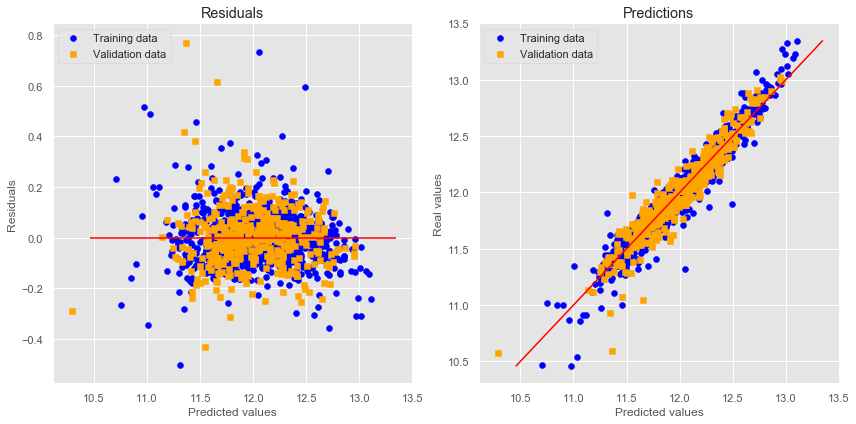

In [110]:
model_evaluation_plots(lasso, X_train, y_train, X_test, y_test)

## Conclusion

Therefore, I can conclude that LASSO regression is the better learning algorithm to use since it gives a better test RSME than Ridge (0.11777 vs 0.12961). 

Compared to the Dummy Regressor (Test RSME - 0.134), it also performs better.

### References

[Exploratory Data Analysis of Housing in AMES Iowa](https://www.kaggle.com/leeclemmer/exploratory-data-analysis-of-housing-in-ames-iowa/notebook)

### Questions to answer

How is your prediction task defined? And what is the meaning of the output variable?

    The prediction task is to predict the SalePrice of houses in AMES, Iowa, based on features provided in the train.csv.
    The output variable, RSME, represents the difference between values predicted by the models I have used and the actual values.
    
How do you represent your data as features? Did you process the features in any way?

    I performed log transformation, standard scaling and encoding on my
    data in order to represent them as features.
    These functions that I have used allow the models I selected to process the features properly and produce better results.
    I almost feature engineered some new columns so as to consolidate 
    several columns.

Did you bring in any additional sources of data?
    
    No.

How did you select which learning algorithms to use?
    
    I selected Linear Regression (easy to implement), Ridge Regression and LASSO Regression since they were used in the tutorial. :^(

Did you try to tune the hyperparameters of the learning algorithm, and in that case how?

    I tuned each regression model by adjusting their alpha values and using GridSearchCV again, similar to what I did in Part A.
    
How do you evaluate the quality of your system?

    Through RMSE and comparing them against each other and a baseline.
    A lower RMSE means that the model is more accurate at predicting the SalePrice.

How well does your system compare to a stupid baseline?

    It performs well, both Ridge and LASSO obtained lower RMSE scores.

Can you say anything about the errors that the system makes?
    
    Erros made by the system are a result of a lack of sufficient data. 
    This prevents the system from making more accurate predictions.
Is it possible to say something about which features the model considers important?

    For the LASSO regression model, it dropped almost 2/3 of the features.
    It considered TotalSF and OverallQual as the most important features that affected SalePrice positively. 